# OBJETIVO

Criar uma IA que prever quanto iriamos vender depedendo da temperatura e se tem alguma relação.

In [270]:
pip install meteostat

In [271]:
import matplotlib.pyplot as plt
from meteostat import Point, Daily
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

# Defina as coordenadas do local (latitude, longitude, altitude)
location = Point(-3.71722, -38.54337)  # Fortaleza, Ceará

# Defina o intervalo de tempo para os dados (início e ontem)
start = datetime(2000, 1, 1)  # Data de início
end = datetime.now() - timedelta(days=1)  # Até ontem

# Obtenha os dados diários de temperatura
data = Daily(location, start, end)
data = data.fetch()

# exibindo a média da temperatura
data = data[['tavg']]

# observando os dados
data['ano'] = data.index.year
data['mes'] = data.index.month

# exibindo os dados
data
data.describe()

,tavg,ano,mes
count,8675.000000,8988.000000,8988.000000
mean,27.294939,2011.807744,6.464842
std,0.926260,7.106619,3.441638
min,22.700000,2000.000000,1.000000
25%,26.800000,2006.000000,3.000000
50%,27.400000,2012.000000,6.000000
75%,27.900000,2018.000000,9.000000
max,30.000000,2024.000000,12.000000


In [272]:
# verificando valores vazios
data.isnull().sum()

,0
tavg,313
ano,0
mes,0


In [273]:
# eleminando balores vazios
data1 = data.dropna()

# verificando a média da temperatura sem interferência dos valores vazios
data1.describe()

,tavg,ano,mes
count,8675.000000,8675.000000,8675.000000
mean,27.294939,2012.125072,6.474006
std,0.926260,6.992134,3.458521
min,22.700000,2000.000000,1.000000
25%,26.800000,2006.000000,3.000000
50%,27.400000,2012.000000,6.000000
75%,27.900000,2018.000000,9.000000
max,30.000000,2024.000000,12.000000


In [274]:
#substituindo o vazio pela média da temperatura
data = data.fillna(data1.mean())

# varificando de novo
data

,tavg,ano,mes
time,,,
2000-01-01,27.700000,2000,1
2000-01-02,28.600000,2000,1
2000-01-03,27.300000,2000,1
2000-01-04,26.600000,2000,1
2000-01-05,27.294939,2000,1
...,...,...,...
2024-08-05,27.100000,2024,8
2024-08-06,27.000000,2024,8
2024-08-07,27.100000,2024,8


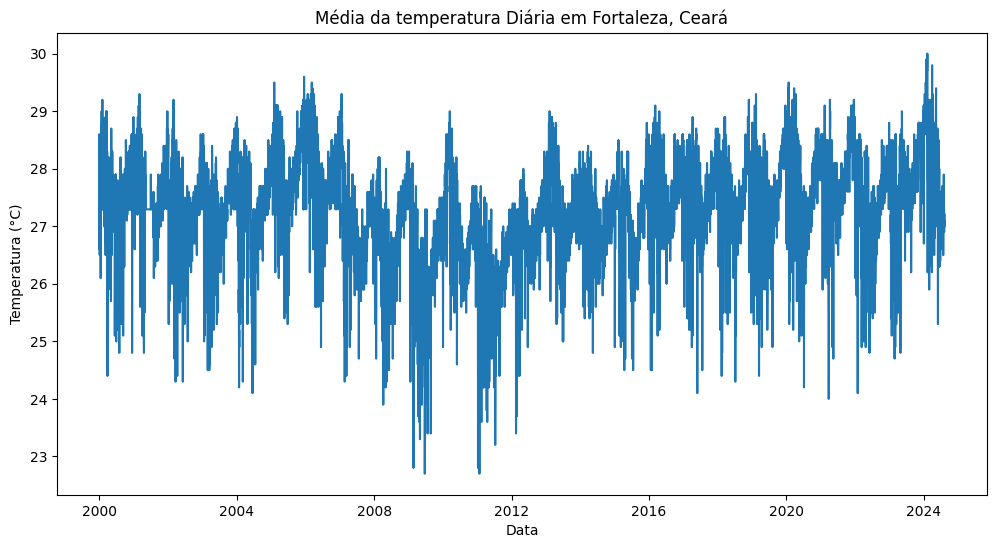

In [275]:
# plotando gráfico de linha
plt.figure(figsize=(12, 6))
plt.title('Média da temperatura Diária em Fortaleza, Ceará')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.plot(data['tavg'])

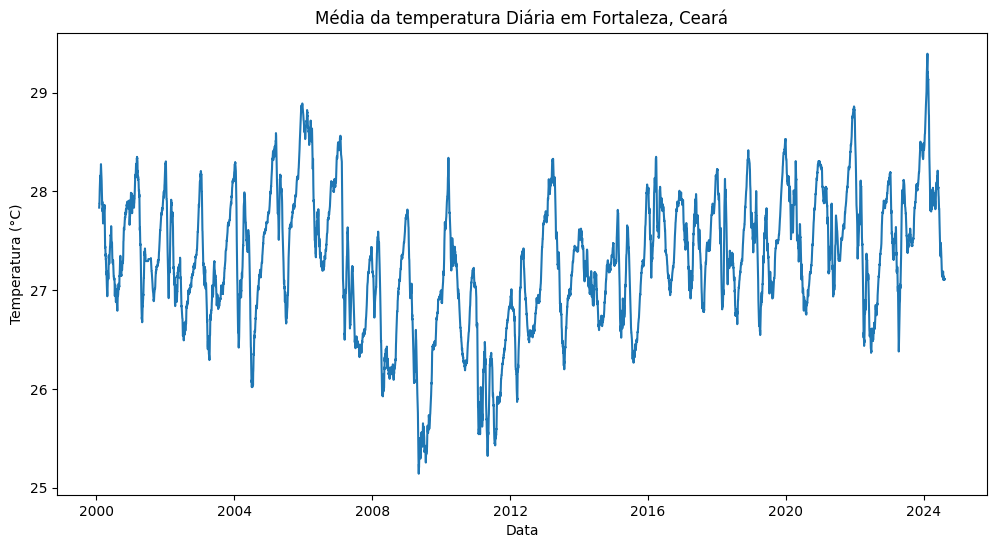

In [276]:
# Média movel temperatura
plt.figure(figsize=(12, 6))
plt.title('Média da temperatura Diária em Fortaleza, Ceará')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.plot(data['tavg'].rolling(window=30).mean())
plt.show()

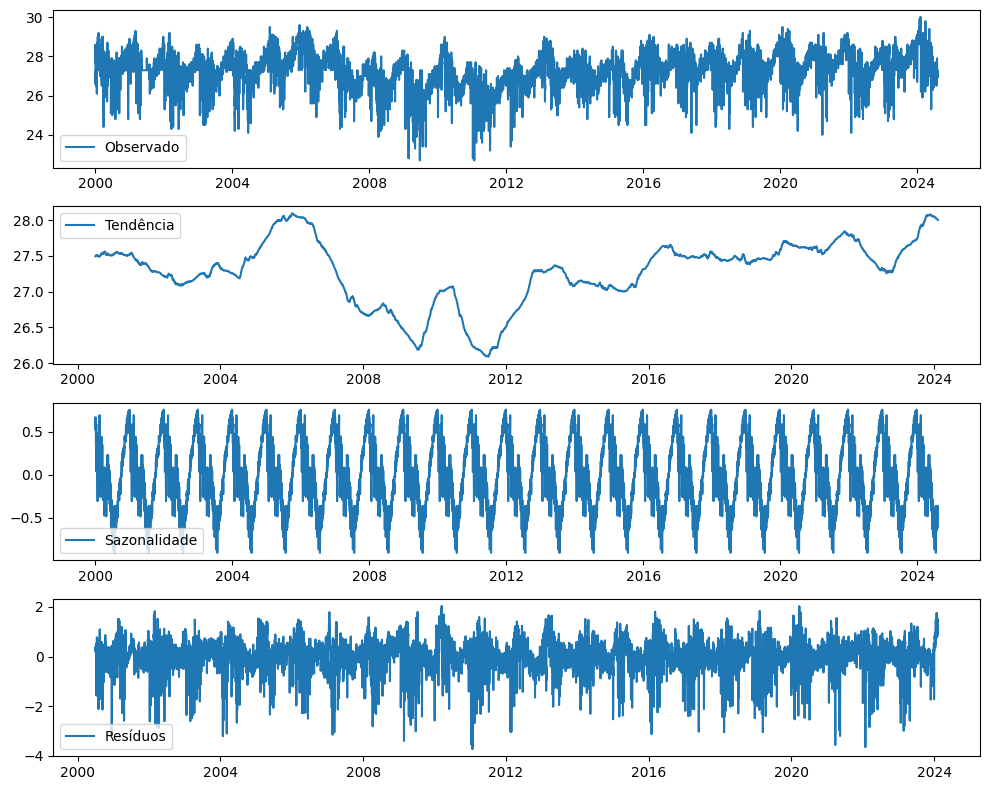

In [277]:

# Realizar a decomposição da série temporal para ver temperatura de fortaleza
decomposicao = seasonal_decompose(data['tavg'], model='additive', period = 365)

# Plotar os componentes da decomposição
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposicao.observed, label='Observado')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(decomposicao.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend()


plt.tight_layout()
plt.show()

Text(0, 0.5, 'Temperatura (°C)')

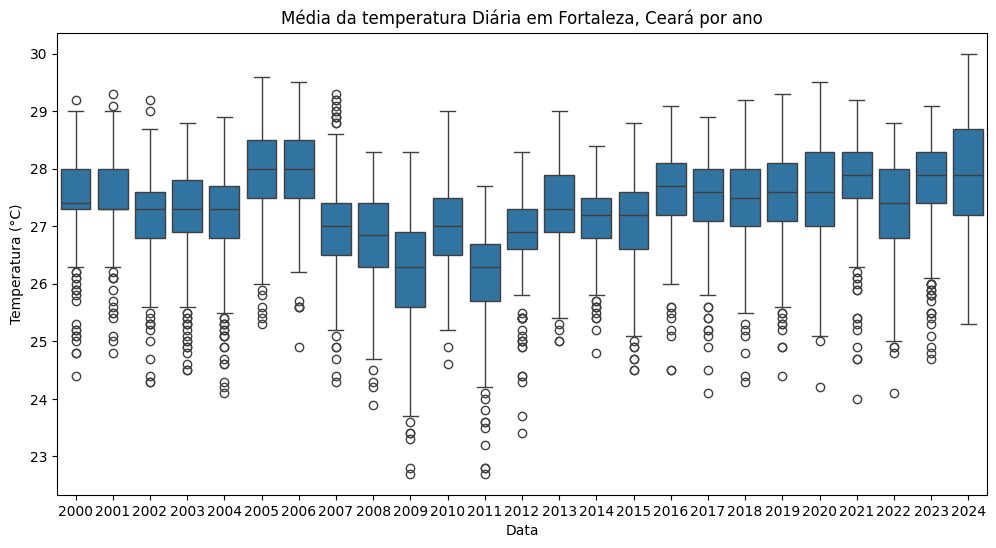

In [278]:
# boxplot media temperatura por ano
plt.figure(figsize=(12, 6))
sns.boxplot(x='ano', y='tavg', data=data)
plt.title('Média da temperatura Diária em Fortaleza, Ceará por ano')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')


<Axes: xlabel='mes', ylabel='tavg'>

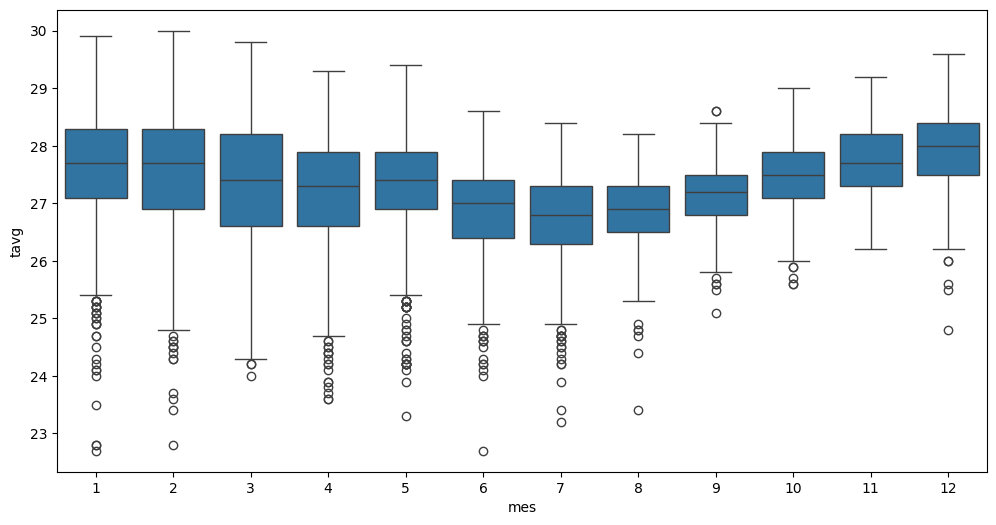

In [279]:
# boxplot media temperatura por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='mes', y='tavg', data=data)

Text(0.5, 0, 'Temperatura (°C)')

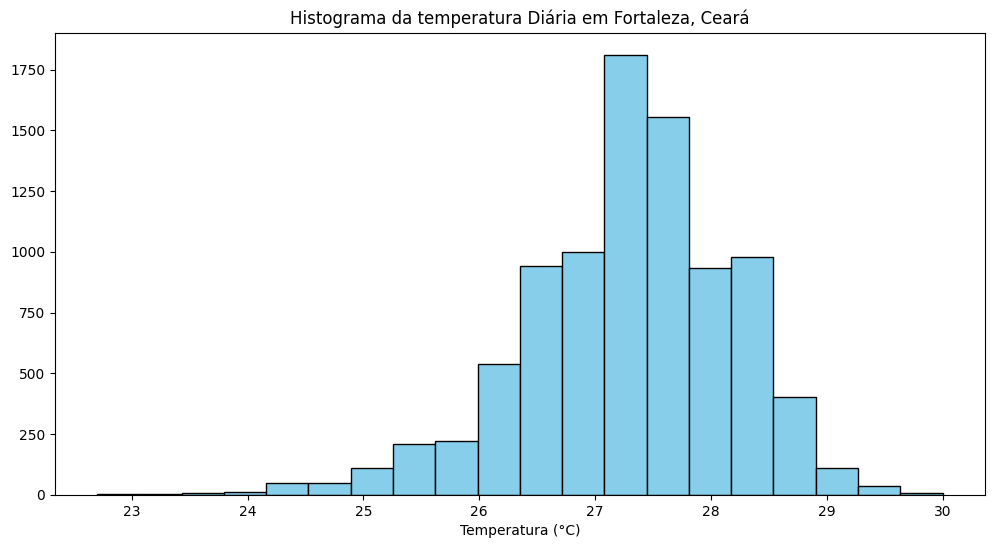

In [280]:
# histograma temperatura
plt.figure(figsize=(12, 6))
plt.hist(data['tavg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da temperatura Diária em Fortaleza, Ceará')
plt.xlabel('Temperatura (°C)')

In [281]:
# importando base de dados vendas de sorvete x temperatura
base_sorvete = pd.read_csv('/content/drive/MyDrive/Analista de dados/Ice Cream Sales - temperatures.csv')
base_sorvete

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
...,...,...
360,99,85.13
361,99,87.08
362,99,89.29
363,101,81.91


In [282]:
# estatística da base de dados
base_sorvete.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


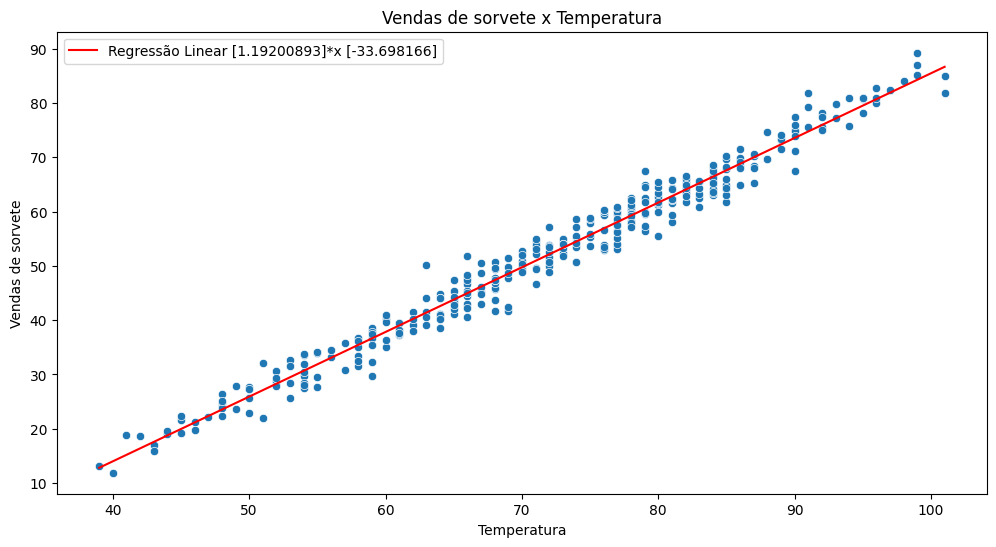

In [304]:
# relação entre vendas e temperatura

# preparação da regressão linear

modelo = LinearRegression()

# separando os dados para x e y
x = base_sorvete['Temperature'].values.reshape(-1,1)
y = base_sorvete['Ice Cream Profits'].values.reshape(-1,1)

# realizando o treinamento e previsão
modelo.fit(x,y)
predict = modelo.predict(x)

# obtendo os coeficientes da regressão linear
b = modelo.intercept_ # coeficiênte linear
a = modelo.coef_[0] # coeficiênte angular

# Gráfico de dispersão e linha de regressão
plt.figure(figsize=(12, 6))
plt.title('Vendas de sorvete x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Vendas de sorvete')
sns.scatterplot(x='Temperature', y='Ice Cream Profits', data=base_sorvete)
plt.plot(base_sorvete['Temperature'], predict, color='red', label = f'Regressão Linear {a}*x {b}')
plt.legend()
plt.show()
